# 01 環境構築とウォームアップ
## Wandasを動かしてみよう

このノートブックでは、Wandasをインストールし、基本的な環境設定を行って、最初の信号処理を体験します。

**学習目標:**
- Wandasのインストールと環境設定
- Jupyter環境でのインタラクティブな操作
- 最初の信号生成と可視化
- 基本的な操作の習得

**前提条件:**
- Python 3.9以上
- Jupyter Notebook環境

## 🎯 なぜ環境構築が重要か

### 信号処理のワークフロー

信号処理の作業では、以下のようなサイクルを繰り返します：

1. **データ収集** → 2. **前処理** → 3. **分析** → 4. **可視化** → 5. **解釈**

このサイクルを効率的に回すためには、適切な環境設定が不可欠です。Wandasは、このワークフローを**1つの統合された環境**で実現します。

### インタラクティブな探索の重要性

信号処理では、**試行錯誤**が不可欠です：
- フィルタのパラメータを調整しながら効果を確認
- 異なる可視化方法を比較
- 処理結果をリアルタイムで評価

Jupyter Notebook + Wandasの組み合わせで、これを可能にします。

## 📦 インストール

### 方法1: PyPIからインストール（推奨）

最新の安定版をインストールします。

In [1]:
# Wandasの最新版をインストール
# !pip install wandas

# 開発版の場合は（オプション）
# !pip install git+https://github.com/kasahart/wandas.git

print("Wandasのインストールコマンド:")
print("!pip install wandas")

Wandasのインストールコマンド:
!pip install wandas


### 方法2: 開発環境の場合

このリポジトリをクローンしている場合は：

In [2]:
# 開発インストール（このリポジトリの場合）
# !pip install -e .

print("開発インストールコマンド:")
print("!pip install -e .")

開発インストールコマンド:
!pip install -e .


### 可視化ライブラリのインストール

インタラクティブなプロットのために必要です。

In [3]:
# インタラクティブプロット用のライブラリ
# !pip install ipympl

print("可視化ライブラリのインストール:")
print("!pip install ipympl")

可視化ライブラリのインストール:
!pip install ipympl


## 🔧 基本的なインポートと確認

### 必要なライブラリのインポート

In [4]:
# 基本的なライブラリをインポート
import wandas as wd  # Wandasライブラリ本体 - 信号処理のメインライブラリ
import numpy as np   # NumPy - 数値計算の基礎ライブラリ
import matplotlib.pyplot as plt  # Matplotlib - 可視化ライブラリ

# バージョン情報を確認
print(f"Wandas: {wd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")

print("\n✅ すべてのライブラリが正常にインポートされました！")

Wandas: 0.1.7
NumPy: 2.0.2
Matplotlib: 3.10.0

✅ すべてのライブラリが正常にインポートされました！


## 🎨 Jupyter環境の設定

### インタラクティブプロットの有効化

信号処理では、**グラフをインタラクティブに操作**することが重要です：
- ズームイン/アウトで詳細を確認
- パンで特定の領域に移動
- データポイントの値を確認

`ipympl`バックエンドを使用することで、これを実現します。

In [5]:
# インタラクティブプロットの設定
%matplotlib widget

# プロットのサイズを設定 - 見やすさを調整
plt.rcParams['figure.figsize'] = (10, 6)  # 図のサイズ (幅10インチ、高さ6インチ)
plt.rcParams['figure.dpi'] = 100         # 解像度 (dots per inch)

print("✅ インタラクティブプロットが有効になりました！")
print("\nグラフ上で:")
print("- マウスホイール: ズームイン/アウト")
print("- 右クリック+ドラッグ: パン")
print("- ホバー: データ値の表示")

✅ インタラクティブプロットが有効になりました！

グラフ上で:
- マウスホイール: ズームイン/アウト
- 右クリック+ドラッグ: パン
- ホバー: データ値の表示


### ipymplの確認

インタラクティブ機能が利用可能か確認します。

In [6]:
# ipymplが利用可能か確認 - インタラクティブ機能の前提条件
try:
    import ipympl
    print(f"✅ ipympl: {ipympl.__version__} - インタラクティブ機能が利用可能です")
except ImportError:
    print("⚠️  ipymplがインストールされていません")
    print("   インタラクティブ機能が制限されます")
    print("   インストール: pip install ipympl")

✅ ipympl: 0.9.6 - インタラクティブ機能が利用可能です


## 🎵 最初の信号生成

### なぜ信号生成から始めるのか

実際のデータ分析に入る前に、**既知の信号を生成**することで：
- Wandasの基本操作を学ぶ
- 期待される結果を確認できる
- トラブルシューティングが容易

これは信号処理の**「Hello, World!」**のようなものです。

In [7]:
# シンプルな正弦波を生成 - Wandasの基本的な信号生成関数
simple_tone = wd.generate_sin(
    freqs=[440],        # 440Hz (A4音) - 標準的なコンサートピッチ
    duration=1.0,       # 1秒間 - 信号の長さ
    sampling_rate=44100 # CD品質 - 1秒間に44100サンプル
)

# 生成された信号の基本情報を表示
print("生成された信号の情報:")
print(f"  チャンネル数: {simple_tone.n_channels}")      # チャンネル数 (モノラル=1, ステレオ=2)
print(f"  サンプリングレート: {simple_tone.sampling_rate} Hz")  # 1秒間のサンプル数
print(f"  長さ: {simple_tone.duration:.1f} 秒")        # 信号の時間長
print(f"  サンプル数: {simple_tone.n_samples}")        # 総サンプル数
print(f"  チャンネル名: {simple_tone.labels}")         # 各チャンネルの名前

生成された信号の情報:
  チャンネル数: 1
  サンプリングレート: 44100 Hz
  長さ: 1.0 秒
  サンプル数: 44100
  チャンネル名: ['Channel 1']


### 信号の可視化

Wandasの最も強力な機能の一つが、**一つのメソッドで包括的な可視化**ができることです。

/home/vscode/.venv/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


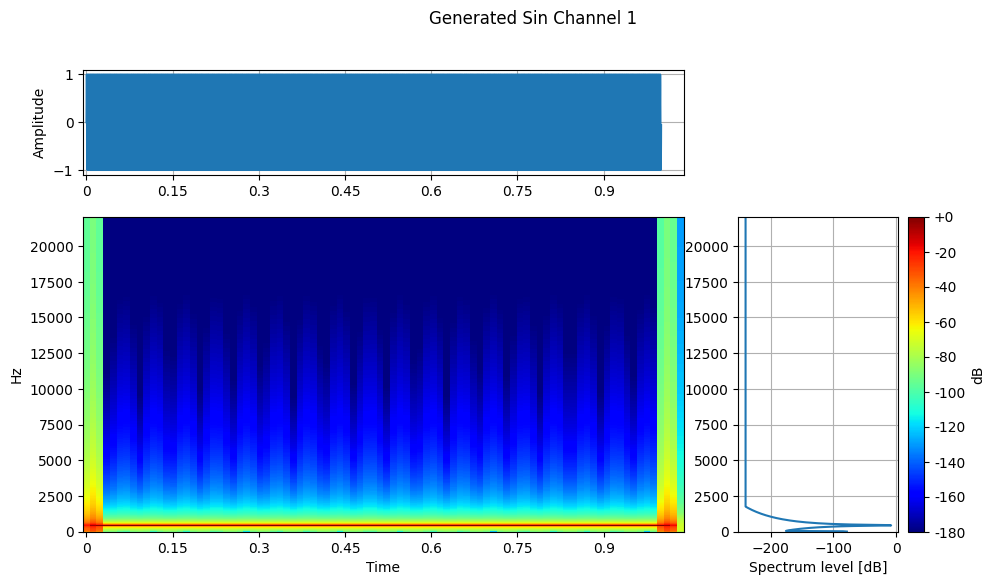

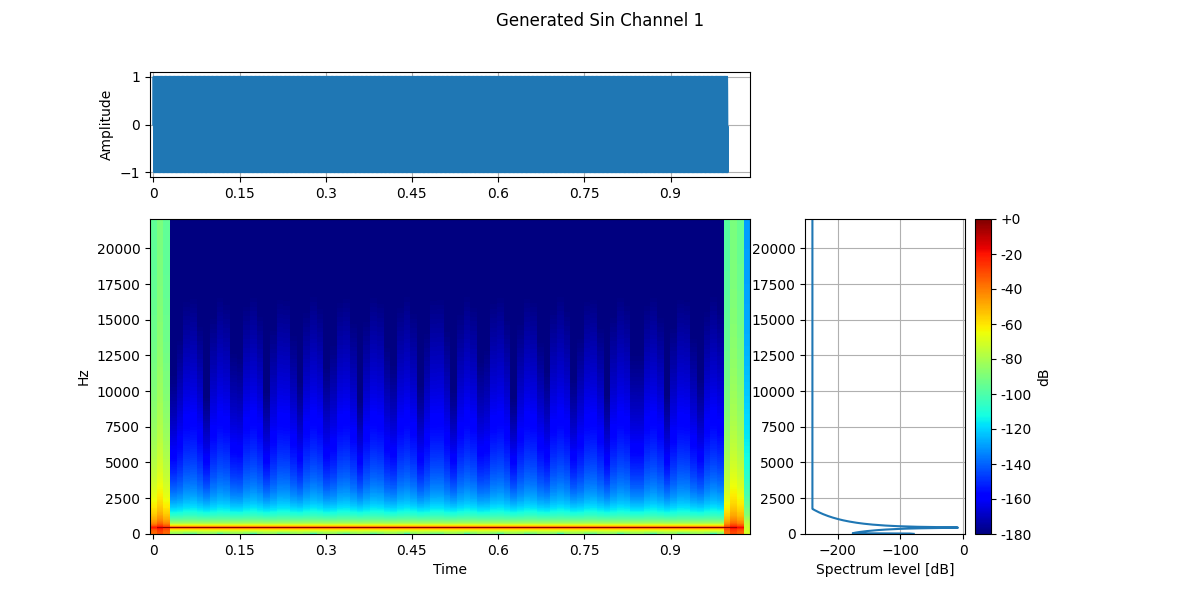

In [8]:
# describe()メソッドで完全な分析を表示 - Wandasの強力な可視化機能
# is_close=False: プロットウィンドウを自動で閉じない設定。インタラクティブな操作が可能
simple_tone.describe(is_close=False)

**🎉 `describe()`メソッドで:**
- **時間領域**: 波形の形状を確認
- **周波数領域**: スペクトル（周波数成分）を確認
- **時間周波数領域**: スペクトログラム（時間変化）を確認

が一度に表示されました。

## 🔄 メソッドチェーンの体験

### Wandasの核心機能

Wandasの最大の特徴は、**メソッドチェーン**による直感的な処理です。

これはpandasのようなAPIで、処理を**自然言語のように**連鎖できます。

✅ メソッドチェーンによる処理が完了しました！
Operation history (3):
1: sum {}
2: fade {'params': {'fade_ms': 10}}
3: lowpass_filter {'params': {'cutoff': 1000, 'order': 4}}


/home/vscode/.venv/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


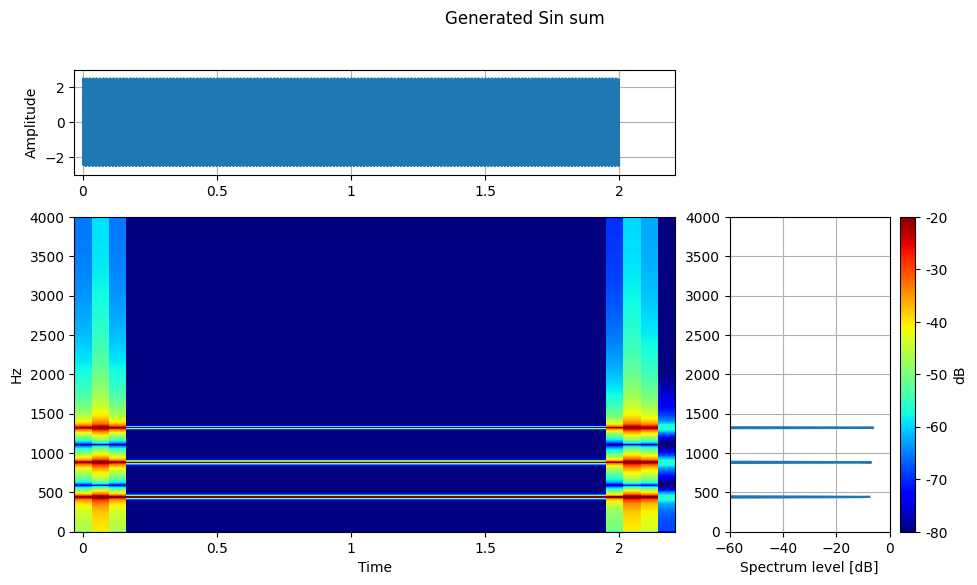

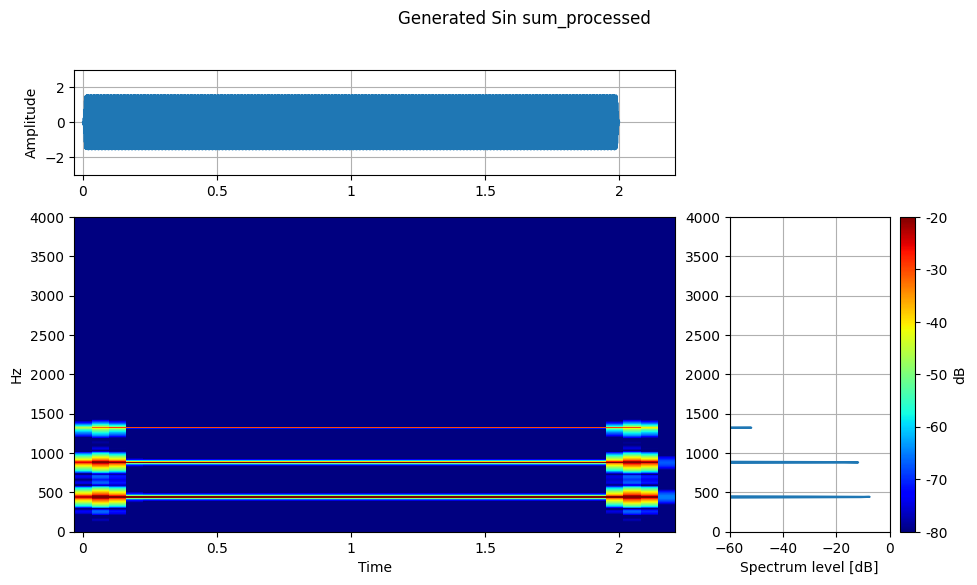

In [9]:
# より複雑な信号を生成
complex_signal = wd.generate_sin(
    freqs=[440, 880, 1320],  # 基本音 + 倍音 (440Hzの2倍と3倍)
    duration=2.0,             # 2秒間 - より長い信号
    sampling_rate=8000,       # 8kHz - 電話品質のサンプリングレート
).sum()

# メソッドチェーンで処理 - pandasライクな直感的な処理
processed = (
    complex_signal
    .fade(fade_ms=10)  # フェイドイン・アウトの時間 (10ミリ秒)
    .low_pass_filter(cutoff=1000)  # 1kHzでローパスフィルタ
)

print("✅ メソッドチェーンによる処理が完了しました！")

# 処理履歴を表示 - どのような処理が適用されたかを確認
processed.print_operation_history()

# 処理前後の比較 - 信号処理の効果を視覚的に確認
combined_signal = complex_signal.add_channel(processed, suffix_on_dup='_processed')


# TypedDictを使用した詳細設定 - 型安全な設定方法
from wandas.visualization.types import DescribeParams
config: DescribeParams = {
    "fmin": 100,      # 周波数軸の最小値 (100Hz)
    "fmax": 3000,     # 周波数軸の最大値 (3000Hz)
    "cmap": "jet",    # カラーマップ (jet: 虹色)
    "vmin": -80,      # スペクトログラムの最小値 (dB)
    "vmax": -20,      # スペクトログラムの最大値 (dB)
    "waveform": {"ylim": (-3, 3)},  # 波形のY軸範囲
    "spectral": {"xlim": (-60, 0)},     # スペクトルのX軸範囲 (dB)
}

# 設定を適用して詳細な分析を表示
combined_signal.describe(**config)

<Axes: title={'center': 'Spectrum of Generated Sin'}, xlabel='Frequency [Hz]', ylabel='Spectrum level [dB]'>

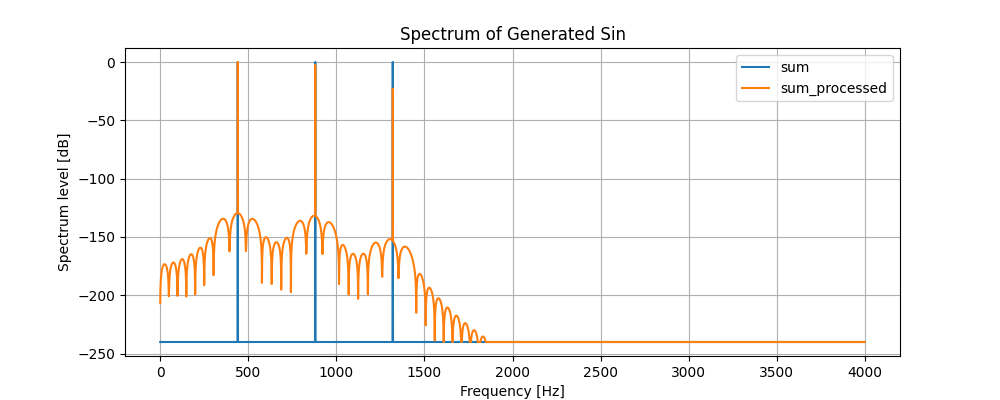

In [10]:
combined_signal.fft().plot(overlay=True)  # 元の信号と処理後の信号を比較表示

## 🎮 インタラクティブな実験

### パラメータを変更して実験

信号処理の面白さは、**パラメータを変更しながら結果を確認**できることです。

以下のセルで、さまざまなパラメータを試してみましょう。

/home/vscode/.venv/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


<Axes: title={'center': 'Original and Filtered Signal Spectrum'}, xlabel='Frequency [Hz]', ylabel='Spectrum level [dB]'>

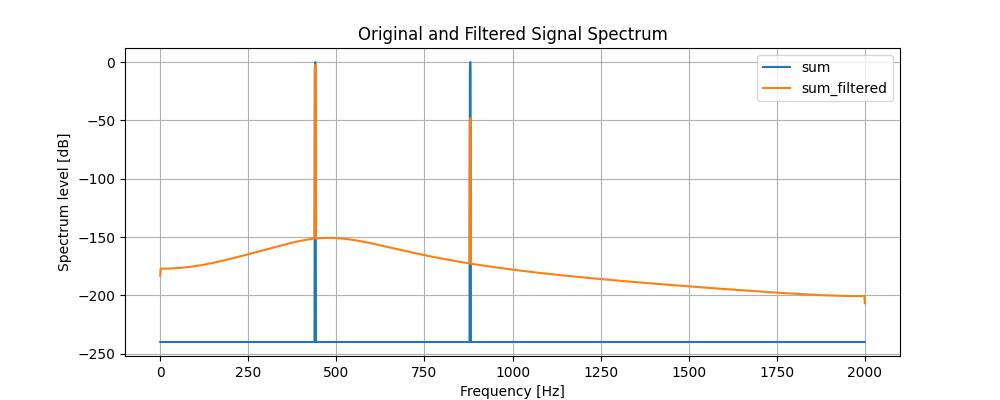

In [11]:
# 実験用の関数を定義 - パラメータを変更して信号処理を試すための関数
def experiment_with_signal(frequency=440, duration=1.0, filter_cutoff=500):
    """
    周波数、時間、フィルタのカットオフを変更して実験。

    指定されたパラメータで正弦波信号を生成し、ローパスフィルタを適用して
    元の信号とフィルタ済み信号を比較できるようにします。

    Parameters
    ----------
    frequency : float, default=440
        基本周波数 [Hz]。この周波数とその2倍の周波数（倍音）で
        信号を生成します。A4音（440Hz）がデフォルトです。
    duration : float, default=1.0
        信号の長さ [秒]。生成される信号の時間長を指定します。
    filter_cutoff : float, default=500
        ローパスフィルタのカットオフ周波数 [Hz]。
        この周波数以上の成分が減衰されます。

    Returns
    -------
    ChannelFrame
        元の信号とフィルタ済み信号が結合されたChannelFrame。
        チャンネル名は元の信号が "signal"、フィルタ済みが "signal_filtered" となります。

    Examples
    --------
    >>> # デフォルトパラメータで実行
    >>> result = experiment_with_signal()
    >>> result.fft().plot(overlay=True)

    >>> # パラメータを変更して実験
    >>> result = experiment_with_signal(frequency=880, filter_cutoff=1500)
    >>> result.fft().plot(overlay=True)
    """

    # 信号生成 - 指定された周波数で基本音と倍音を作成
    signal = wd.generate_sin(
        freqs=[frequency, frequency*2],  # 基本音 + 倍音
        duration=duration,                # 指定された長さ
        sampling_rate=4000               # 4kHzサンプリング (実験用)
    ).sum()

    # フィルタ処理 - 指定されたカットオフ周波数でローパスフィルタ適用
    filtered = signal.low_pass_filter(cutoff=filter_cutoff)

    # 処理した信号を元の信号のchannel frameに追加 - 比較のため
    combined = signal.add_channel(filtered, suffix_on_dup="_filtered")
    return combined

# デフォルトパラメータで実行 - 基本的な実験
experiment_with_signal().fft().plot(overlay=True, title="Original and Filtered Signal Spectrum")

/home/vscode/.venv/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


<Axes: title={'center': 'Original and Filtered Signal Spectrum'}, xlabel='Frequency [Hz]', ylabel='Spectrum level [dB]'>

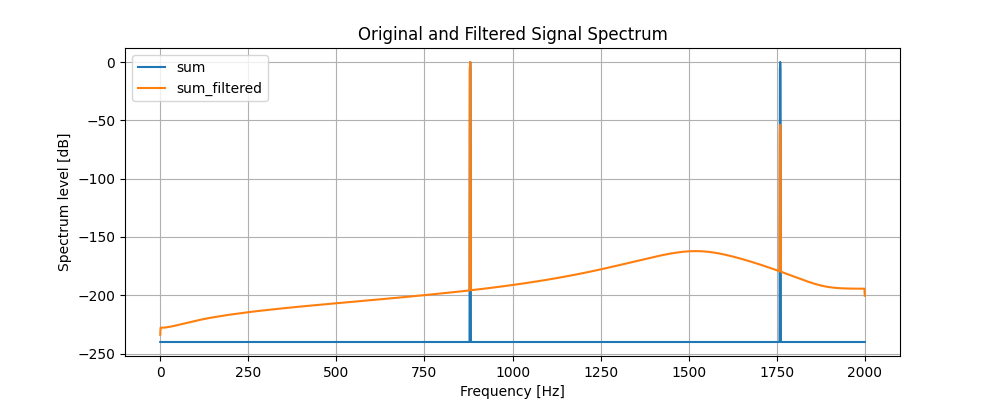

In [12]:
# パラメータを変更して実験
# 例: より高い周波数で試す
experiment_with_signal(frequency=880, filter_cutoff=1500).fft().plot(overlay=True, title="Original and Filtered Signal Spectrum")


## 🛠️ トラブルシューティング

### よくある問題と解決法

#### 1. インタラクティブプロットが動作しない
```python
# 解決法
!pip install ipympl --upgrade
# JupyterLabの場合
!jupyter labextension install jupyter-matplotlib
```

#### 2. バージョン互換性の問題
- Python 3.9以上を使用してください
- 最新版のWandasを使用してください

#### 3. メモリ不足
- 時間を短くする
- サンプリングレートを下げる

#### 4. プロットが表示されない
- `%matplotlib widget` が正しく設定されているか確認
- Jupyterのカーネルを再起動

In [13]:
# トラブルシューティング: インタラクティブプロットが動作しない場合の解決法
# !pip install ipympl --upgrade  # アップグレードが必要な場合

# JupyterLabの場合の追加設定 - 環境による違いに対応
# !jupyter labextension install jupyter-matplotlib

# 現在の設定状況を表示
print("インタラクティブプロットのトラブルシューティング:")
print("1. ipymplパッケージがインストールされているか確認")
print("2. JupyterLabを使用している場合はlabextensionもインストール")
print("3. カーネルを再起動して %matplotlib widget を再実行")

# 現在のmatplotlibバックエンドを確認 - デバッグ情報
import matplotlib
print(f"現在のバックエンド: {matplotlib.get_backend()}")

# ipymplが利用可能か確認 - 機能チェック
try:
    import ipympl
    print(f"✅ ipymplバージョン: {ipympl.__version__}")
except ImportError:
    print("⚠️ ipymplがインストールされていません")

インタラクティブプロットのトラブルシューティング:
1. ipymplパッケージがインストールされているか確認
2. JupyterLabを使用している場合はlabextensionもインストール
3. カーネルを再起動して %matplotlib widget を再実行
現在のバックエンド: widget
✅ ipymplバージョン: 0.9.6


## 📚 次のステップ

環境構築と基本操作が完了しました！

**次のノートブック**: [02_working_with_data.ipynb](02_working_with_data.ipynb)

ここでは、実際のデータファイル（WAV, CSVなど）を読み込んで、Wandasのデータ構造について紹介します。

### 🎯 これまでに学んだこと
- ✅ Wandasのインストールと環境設定
- ✅ インタラクティブなJupyter環境の構築
- ✅ 信号生成と基本的な可視化
- ✅ メソッドチェーンによる直感的な処理
- ✅ パラメータ変更による実験

### 🚀 次の学習目標
- 実際のデータファイルの読み込み
- ChannelFrameデータ構造の理解
- チャンネル操作とインデックスアクセス
- メタデータの管理

---

**準備はできましたか？次のノートブックへ進みましょう！** 🎵